In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon/amazon_reviews.csv


In [2]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("/kaggle/input/amazon/amazon_reviews.csv")
data

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [4]:
data.describe()

,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,2457.000000,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,1418.982617,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1228.500000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3685.500000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [5]:
data.shape

(4915, 12)

In [6]:
data.dtypes

Unnamed: 0                int64
reviewerName             object
overall                 float64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object

<AxesSubplot:>

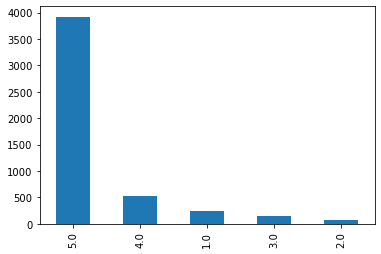

In [7]:
data.overall.value_counts().plot(kind="bar")

In [8]:
#Creating three categories for reviews : Positive(4-5), Negative(1-2), Neutral(3)
data["review_sentiment"] = pd.cut(
    x=data["overall"],
    bins=[0, 2, 3,np.inf],
    labels=["Negative", "Neutral", "Positive"],
)

<AxesSubplot:>

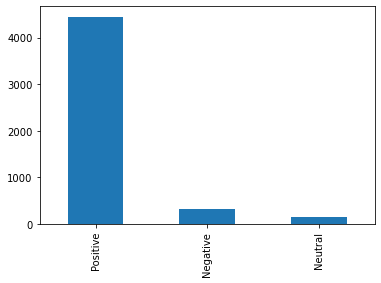

In [9]:
data.review_sentiment.value_counts().plot(kind="bar")

In [10]:
data.shape

(4915, 13)

In [11]:
#Dropping the rows with neutral reviews in order to have a binary classification problem
data.drop(data.loc[data['overall']==3].index, inplace=True)
data.shape
#142 rows got deleted

(4773, 13)

In [12]:
data.isna().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
review_sentiment        0
dtype: int64

In [13]:
# Dropping rows with null values (2 rows are deleted)
data = data.dropna(axis=0)

In [14]:
data.isna().sum()

Unnamed: 0              0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
review_sentiment        0
dtype: int64

In [15]:
# Bag of words model for analysis

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r"[a-zA-Z0-9]+")
cv = CountVectorizer(stop_words="english",ngram_range=(1,1),tokenizer=token.tokenize)
text_counts = cv.fit_transform(data['reviewText'])
text_counts

<4771x8068 sparse matrix of type '<class 'numpy.int64'>'
	with 102231 stored elements in Compressed Sparse Row format>

In [16]:
# A sparse matrix is created by CountVectorizor. We are using only unigrams. All stopwords are deleted.
count_array = text_counts.toarray()
df = pd.DataFrame(data=count_array,columns = cv.get_feature_names())
df.head()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,00,000,00128,002,00s,01,017,022,024b,...,zips,zl,zone,zoning,zoom,zte,ztpad,zumo,zune,zunehd
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(text_counts,data['review_sentiment'], test_size =0.25, random_state=5)

In [18]:
Y_test_coded = []
for i in Y_test:
    if i=="Positive":
        Y_test_coded.append(1)
    else:
        Y_test_coded.append(0)

In [19]:
# Build a Multinomial naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,Y_train)

MultinomialNB()

In [20]:
#Model Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Confusion Matrix")
matrix = confusion_matrix(Y_test, NB_classifier.predict(X_test))
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(Y_test, NB_classifier.predict(X_test))
print(report)

# Accuracy of the model
accuracy = accuracy_score(Y_test, NB_classifier.predict(X_test))
print('MNB Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))

Confusion Matrix
[[  51   28]
 [  21 1093]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.71      0.65      0.68        79
    Positive       0.98      0.98      0.98      1114

    accuracy                           0.96      1193
   macro avg       0.84      0.81      0.83      1193
weighted avg       0.96      0.96      0.96      1193

MNB Classifier Accuracy of the model: 95.89%


In [21]:
# Build a Gaussian naive bayes classifier
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train.todense(),Y_train)

#Model Evaluation
print("Confusion Matrix")
matrix = confusion_matrix(Y_test, GNB_classifier.predict(X_test.todense()))
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(Y_test, GNB_classifier.predict(X_test.todense()))
print(report)

# Accuracy of the model
accuracy = accuracy_score(Y_test, GNB_classifier.predict(X_test.todense()))
print('GNB Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Confusion Matrix
[[ 24  55]
 [304 810]]

Classification Report


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


              precision    recall  f1-score   support

    Negative       0.07      0.30      0.12        79
    Positive       0.94      0.73      0.82      1114

    accuracy                           0.70      1193
   macro avg       0.50      0.52      0.47      1193
weighted avg       0.88      0.70      0.77      1193

GNB Classifier Accuracy of the model: 69.91%


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [22]:
# Build a Complement naive bayes classifier
from sklearn.naive_bayes import ComplementNB
CNB_classifier = ComplementNB()
CNB_classifier.fit(X_train,Y_train)

#Model Evaluation
print("Confusion Matrix")
matrix = confusion_matrix(Y_test, CNB_classifier.predict(X_test))
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(Y_test, GNB_classifier.predict(X_test.todense()))
print(report)

# Accuracy of the model
accuracy = accuracy_score(Y_test, GNB_classifier.predict(X_test.todense()))
print('CNB Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))

Confusion Matrix
[[  62   17]
 [  43 1071]]

Classification Report


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


              precision    recall  f1-score   support

    Negative       0.07      0.30      0.12        79
    Positive       0.94      0.73      0.82      1114

    accuracy                           0.70      1193
   macro avg       0.50      0.52      0.47      1193
weighted avg       0.88      0.70      0.77      1193

CNB Classifier Accuracy of the model: 69.91%


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [23]:
#Other classifiers
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
LogReg = LogisticRegression()
SGDClassifier = SGDClassifier()
LSVClassifier = LinearSVC()

In [24]:
LogReg.fit(X_train,Y_train)
accuracy_score_lr = metrics.accuracy_score(LogReg.predict(X_test),Y_test)
#Model Evaluation
print("Confusion Matrix")
matrix = confusion_matrix(Y_test, LogReg.predict(X_test))
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(Y_test, LogReg.predict(X_test))
print(report)

# Accuracy of the model
accuracy = accuracy_score(Y_test, LogReg.predict(X_test))
print('LogReg Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))

Confusion Matrix
[[  40   39]
 [   5 1109]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.89      0.51      0.65        79
    Positive       0.97      1.00      0.98      1114

    accuracy                           0.96      1193
   macro avg       0.93      0.75      0.81      1193
weighted avg       0.96      0.96      0.96      1193

LogReg Classifier Accuracy of the model: 96.31%


In [25]:
SGDClassifier.fit(X_train,Y_train)

#Model Evaluation
print("Confusion Matrix")
matrix = confusion_matrix(Y_test, SGDClassifier.predict(X_test))
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(Y_test, SGDClassifier.predict(X_test))
print(report)

# Accuracy of the model
accuracy = accuracy_score(Y_test, SGDClassifier.predict(X_test))
print('SGD Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))

Confusion Matrix
[[  49   30]
 [  27 1087]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.64      0.62      0.63        79
    Positive       0.97      0.98      0.97      1114

    accuracy                           0.95      1193
   macro avg       0.81      0.80      0.80      1193
weighted avg       0.95      0.95      0.95      1193

SGD Classifier Accuracy of the model: 95.22%


In [26]:
LSVClassifier.fit(X_train,Y_train)

#Model Evaluation
print("Confusion Matrix")
matrix = confusion_matrix(Y_test, LSVClassifier.predict(X_test))
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(Y_test, LSVClassifier.predict(X_test))
print(report)

# Accuracy of the model
accuracy = accuracy_score(Y_test, LSVClassifier.predict(X_test))
print('LSV Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))


Confusion Matrix
[[  45   34]
 [  10 1104]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.82      0.57      0.67        79
    Positive       0.97      0.99      0.98      1114

    accuracy                           0.96      1193
   macro avg       0.89      0.78      0.83      1193
weighted avg       0.96      0.96      0.96      1193

LSV Classifier Accuracy of the model: 96.31%


In [27]:
#Using TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_counts_tfidf = tfidf.fit_transform(data['reviewText'])
text_counts_tfidf

<4771x8316 sparse matrix of type '<class 'numpy.float64'>'
	with 173679 stored elements in Compressed Sparse Row format>

In [28]:
count_array = text_counts_tfidf.toarray()
df = pd.DataFrame(data=count_array,columns = tfidf.get_feature_names())
df.head()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,00128,002,00s,01,017,022,024b,03,...,zips,zl,zone,zoning,zoom,zte,ztpad,zumo,zune,zunehd
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
X_train,X_test, Y_train, Y_test = train_test_split(text_counts_tfidf,data['review_sentiment'], test_size =0.25, random_state=5)

In [30]:
NB_classifier.fit(X_train,Y_train)

#Model Evaluation
print("Confusion Matrix")
matrix = confusion_matrix(Y_test, NB_classifier.predict(X_test))
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(Y_test, NB_classifier.predict(X_test))
print(report)

# Accuracy of the model
accuracy = accuracy_score(Y_test, NB_classifier.predict(X_test))
print('MNB Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))


Confusion Matrix
[[   0   79]
 [   3 1111]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        79
    Positive       0.93      1.00      0.96      1114

    accuracy                           0.93      1193
   macro avg       0.47      0.50      0.48      1193
weighted avg       0.87      0.93      0.90      1193

MNB Classifier Accuracy of the model: 93.13%


In [31]:
GNB_classifier.fit(X_train.todense(),Y_train)
accuracy_score_gnb = metrics.accuracy_score(GNB_classifier.predict(X_test.todense()),Y_test)

#Model Evaluation
print("Confusion Matrix")
matrix = confusion_matrix(Y_test, GNB_classifier.predict(X_test.todense()))
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(Y_test, GNB_classifier.predict(X_test.todense()))
print(report)

# Accuracy of the model
accuracy = accuracy_score(Y_test, GNB_classifier.predict(X_test.todense()))
print('GNB Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Confusion Matrix


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[[ 24  55]
 [281 833]]

Classification Report


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


              precision    recall  f1-score   support

    Negative       0.08      0.30      0.12        79
    Positive       0.94      0.75      0.83      1114

    accuracy                           0.72      1193
   macro avg       0.51      0.53      0.48      1193
weighted avg       0.88      0.72      0.79      1193

GNB Classifier Accuracy of the model: 71.84%


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [32]:
CNB_classifier.fit(X_train,Y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB_classifier.predict(X_test),Y_test)

#Model Evaluation
print("Confusion Matrix")
matrix = confusion_matrix(Y_test, CNB_classifier.predict(X_test))
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(Y_test, CNB_classifier.predict(X_test))
print(report)

# Accuracy of the model
accuracy = accuracy_score(Y_test, CNB_classifier.predict(X_test))
print('CNB Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))

Confusion Matrix
[[   1   78]
 [   6 1108]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.14      0.01      0.02        79
    Positive       0.93      0.99      0.96      1114

    accuracy                           0.93      1193
   macro avg       0.54      0.50      0.49      1193
weighted avg       0.88      0.93      0.90      1193

CNB Classifier Accuracy of the model: 92.96%


In [33]:
#Performed on tf-idf data
LogReg.fit(X_train,Y_train)
accuracy_score_lr = metrics.accuracy_score(LogReg.predict(X_test),Y_test)

#Model Evaluation
print("Confusion Matrix")
matrix = confusion_matrix(Y_test, LogReg.predict(X_test))
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(Y_test, LogReg.predict(X_test))
print(report)

# Accuracy of the model
accuracy = accuracy_score(Y_test, LogReg.predict(X_test))
print('LogReg Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))

Confusion Matrix
[[  10   69]
 [   0 1114]]

Classification Report
              precision    recall  f1-score   support

    Negative       1.00      0.13      0.22        79
    Positive       0.94      1.00      0.97      1114

    accuracy                           0.94      1193
   macro avg       0.97      0.56      0.60      1193
weighted avg       0.95      0.94      0.92      1193

LogReg Classifier Accuracy of the model: 94.22%


In [34]:
SGDClassifier.fit(X_train,Y_train)
accuracy_score_sgd = metrics.accuracy_score(SGDClassifier.predict(X_test),Y_test)

#Model Evaluation
print("Confusion Matrix")
matrix = confusion_matrix(Y_test, SGDClassifier.predict(X_test))
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(Y_test, SGDClassifier.predict(X_test))
print(report)

# Accuracy of the model
accuracy = accuracy_score(Y_test, SGDClassifier.predict(X_test))
print('SDG Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))

Confusion Matrix
[[  42   37]
 [   5 1109]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.89      0.53      0.67        79
    Positive       0.97      1.00      0.98      1114

    accuracy                           0.96      1193
   macro avg       0.93      0.76      0.82      1193
weighted avg       0.96      0.96      0.96      1193

SDG Classifier Accuracy of the model: 96.48%


In [35]:
LSVClassifier.fit(X_train,Y_train)
accuracy_score_svc = metrics.accuracy_score(LSVClassifier.predict(X_test),Y_test)

#Model Evaluation
print("Confusion Matrix")
matrix = confusion_matrix(Y_test, LSVClassifier.predict(X_test))
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(Y_test, LSVClassifier.predict(X_test))
print(report)

# Accuracy of the model
accuracy = accuracy_score(Y_test, LSVClassifier.predict(X_test))
print('LSV Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))

Confusion Matrix
[[  38   41]
 [   2 1112]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.95      0.48      0.64        79
    Positive       0.96      1.00      0.98      1114

    accuracy                           0.96      1193
   macro avg       0.96      0.74      0.81      1193
weighted avg       0.96      0.96      0.96      1193

LSV Classifier Accuracy of the model: 96.40%
